In [1]:
import matplotlib.pyplot as plt

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic

In [2]:
N = 64
p = 3

llf_solver = EulerSolver(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer, x, y, z, vx=1, bounds=(1, 2)
    ),
    nx=N,
    p=p,
    ZS=True,
    limiting_vars=("rho",),
    PAD={"rho": (1, 2)},
    adaptive_timestepping=False,
    nodes_from_primitive_fv_averages=True,
    riemann_solver="llf",
)
llf_solver.run(1.0)

hllc_solver = EulerSolver(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer, x, y, z, vx=1, bounds=(1, 2)
    ),
    nx=N,
    p=p,
    ZS=True,
    limiting_vars=("rho",),
    PAD={"rho": (1, 2)},
    adaptive_timestepping=False,
    nodes_from_primitive_fv_averages=True,
    riemann_solver="hllc",
)
hllc_solver.run(1.0)

100%|██████████| 1.0/1.0 [00:01]                  
100%|██████████| 1.0/1.0 [00:01]                 


(0.625, 0.875)

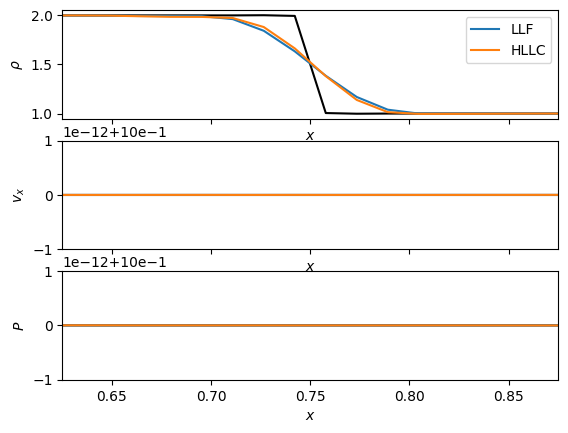

In [3]:
fig, axs = plt.subplots(3, 1, sharex=True)
llf_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=0, color="k")
llf_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=1, label="LLF")
hllc_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=1, label="HLLC")
axs[0].set_ylabel(r"$\rho$")
llf_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=0, color="k")
llf_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=1, label="LLF")
hllc_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=1, label="HLLC")
axs[1].set_ylabel(r"$v_x$")
llf_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=0, color="k")
llf_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=1, label="LLF")
hllc_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=1, label="HLLC")
axs[2].set_ylabel(r"$P$")
axs[2].set_xlabel(r"$x$")
axs[0].legend()
axs[0].set_xlim(0.625, 0.875)